In [1]:
!pip install pydot

In [2]:
!pip install  graphviz

In [3]:
!pip install graphviz

In [4]:
import tensorflow as tf
import pandas as pd

In [5]:
#get data of mnist 

from tensorflow.keras.datasets import mnist

In [6]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [7]:
#the mnist train data consist of 60K rows and 28,28 is column in matricsform
X_train.shape

(60000, 28, 28)

In [8]:
y_test.shape

(10000,)

In [9]:
y_train[5]

2

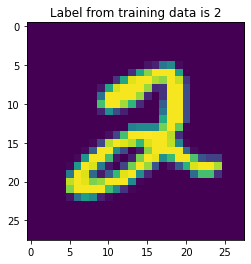

In [10]:
import matplotlib.pyplot as plt
plt.imshow(X_train[5])
plt.title(f"Label from training data is {y_train[5]}")
plt.show()

In [11]:
#preprocessing of data
X_train.shape

(60000, 28, 28)

In [12]:
X_train = X_train.reshape(60000,28*28)
X_test = X_test.reshape(10000,28*28)

In [13]:
X_train.shape

(60000, 784)

In [14]:
X_test.shape

(10000, 784)

In [15]:
#Normalization
import numpy as np
np.max(X_train)

255

In [16]:
np.min(X_train)

0

In [17]:
# 0 - black
# 255 - white
X_train = X_train/255.0
X_test = X_test/255.0
np.max(X_train) , np.min(X_train)

(1.0, 0.0)

In [18]:
#28,28
# Color --> Third dimension - number of color channels

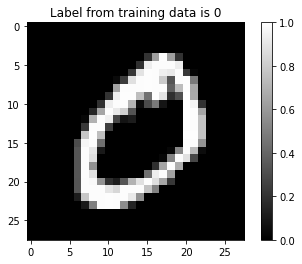

In [19]:
import matplotlib.pyplot as plt
plt.imshow(X_train[1].reshape(28,28),cmap='gray')
plt.title(f"Label from training data is {y_train[1]}")
plt.colorbar()
plt.show()

In [20]:
X_train.shape

(60000, 784)

In [21]:
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [22]:
y_train.shape

(60000, 10)

In [23]:
X_val = X_train[50000:,:]
y_val = y_train[50000:,:]
X_train = X_train[:50000,:]
y_train = y_train[:50000,:]

In [24]:
X_val.shape

(10000, 784)

In [25]:
X_train.shape

(50000, 784)

In [26]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense

In [27]:
model = Sequential()
model.add(Dense(25, activation="relu",input_shape=[784,]))
model.add(Dense(20, activation="relu"))
model.add(Dense(20, activation="relu"))
model.add(Dense(20, activation="relu"))
model.add(Dense(10,activation='softmax'))

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                19625     
                                                                 
 dense_1 (Dense)             (None, 20)                520       
                                                                 
 dense_2 (Dense)             (None, 20)                420       
                                                                 
 dense_3 (Dense)             (None, 20)                420       
                                                                 
 dense_4 (Dense)             (None, 10)                210       
                                                                 
Total params: 21,195
Trainable params: 21,195
Non-trainable params: 0
_________________________________________________________________


In [29]:
tf.keras.utils.plot_model(model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [30]:
model.compile(optimizer="SGD",
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

In [31]:
model.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=100)

Epoch 1/100
1563/1563 [==============================] - 2s 1ms/step - loss: 1.0926 - accuracy: 0.6446 - val_loss: 0.4202 - val_accuracy: 0.8816
Epoch 2/100
1563/1563 [==============================] - 2s 1ms/step - loss: 0.3815 - accuracy: 0.8888 - val_loss: 0.3389 - val_accuracy: 0.8981
Epoch 3/100
1563/1563 [==============================] - 2s 1ms/step - loss: 0.2985 - accuracy: 0.9138 - val_loss: 0.2468 - val_accuracy: 0.9296
Epoch 4/100
1563/1563 [==============================] - 2s 1ms/step - loss: 0.2519 - accuracy: 0.9277 - val_loss: 0.2350 - val_accuracy: 0.9306
Epoch 5/100
1563/1563 [==============================] - 2s 1ms/step - loss: 0.2199 - accuracy: 0.9366 - val_loss: 0.2139 - val_accuracy: 0.9377
Epoch 6/100
1563/1563 [==============================] - 2s 1ms/step - loss: 0.1978 - accuracy: 0.9422 - val_loss: 0.1880 - val_accuracy: 0.9459
Epoch 7/100
1563/1563 [==============================] - 2s 1ms/step - loss: 0.1796 - accuracy: 0.9473 - val_loss: 0.1680 - val_ac

1563/1563 [==============================] - 2s 1ms/step - loss: 0.0395 - accuracy: 0.9876 - val_loss: 0.1647 - val_accuracy: 0.9636
Epoch 58/100
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0396 - accuracy: 0.9875 - val_loss: 0.1820 - val_accuracy: 0.9628
Epoch 59/100
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0376 - accuracy: 0.9884 - val_loss: 0.1630 - val_accuracy: 0.9634
Epoch 60/100
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0379 - accuracy: 0.9878 - val_loss: 0.1698 - val_accuracy: 0.9644
Epoch 61/100
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0370 - accuracy: 0.9882 - val_loss: 0.1664 - val_accuracy: 0.9637
Epoch 62/100
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0371 - accuracy: 0.9882 - val_loss: 0.1793 - val_accuracy: 0.9636
Epoch 63/100
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0352 - accuracy: 0.9894 - val_loss: 0.1700 - val_accuracy

In [32]:
y_pred = model.predict(X_test)
y_pred

array([[2.1233538e-18, 9.9921321e-11, 5.8481193e-09, ..., 1.0000000e+00,
        9.0862945e-13, 1.8343374e-12],
       [2.1767674e-19, 8.1139383e-08, 9.9999952e-01, ..., 9.7268003e-18,
        1.8676319e-08, 5.2057313e-31],
       [1.7330991e-10, 9.9977404e-01, 1.1973564e-05, ..., 1.8698804e-04,
        2.6043132e-05, 1.2588781e-13],
       ...,
       [3.3279643e-25, 5.0022814e-22, 8.8251104e-22, ..., 4.1100527e-17,
        5.8313464e-16, 6.3947990e-13],
       [9.0029955e-19, 2.4639102e-13, 5.2681773e-18, ..., 2.2876081e-23,
        9.9611586e-10, 5.7902914e-17],
       [5.1141133e-22, 2.4140122e-23, 1.3305151e-19, ..., 4.7428456e-29,
        6.7332448e-18, 9.2249529e-38]], dtype=float32)

In [33]:
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [34]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

ValueError: Classification metrics can't handle a mix of multilabel-indicator and continuous-multioutput targets